# Plotting

## Plotting observations and model results

[`PointObservation`](../api/PointObservation.html#modelskill.PointObservation)s
and
[`PointModelResult`](../api/PointModelResult.html#modelskill.PointModelResult)s
can be plotted using their `plot` accessor:

In [1]:
import modelskill as ms
o = ms.PointObservation('../data/SW/HKNA_Hm0.dfs0', item=0, x=4.2420, y=52.6887)
mr = ms.PointModelResult('../data/SW/ts_storm_4.dfs0', item=0) # TODO coords

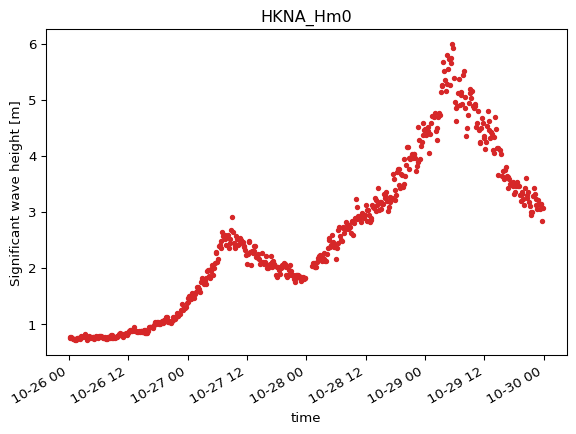

In [2]:
o.plot.timeseries();

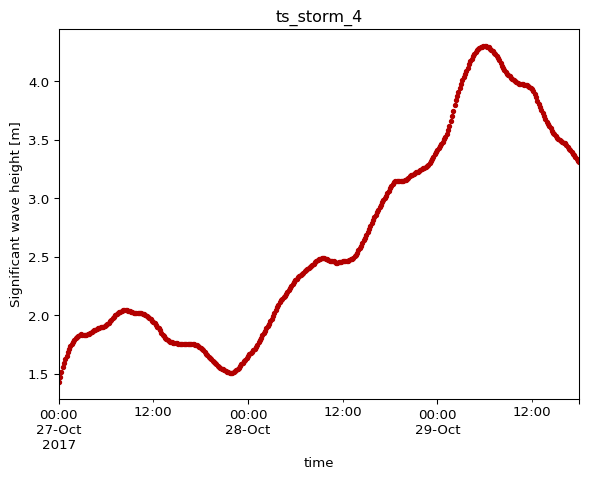

In [3]:
mr.plot.timeseries();

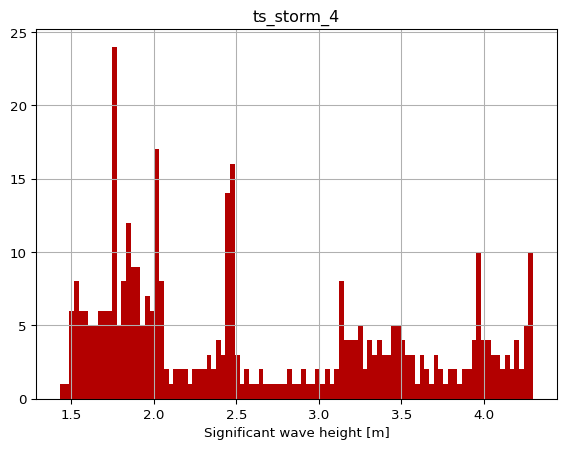

In [4]:
mr.plot.hist();

## Temporal coverage

The temporal coverage of observations and model results can be plotted
using the
[`temporal_coverage`](../api/plotting.temporal_coverage.html#modelskill.plotting.temporal_coverage)
function:

In [5]:
o1 = ms.PointObservation('../data/SW/HKNA_Hm0.dfs0', item=0, x=4.2420, y=52.6887)
o2 = ms.TrackObservation("../data/SW/Alti_c2_Dutch.dfs0", item=3)
mr = ms.DfsuModelResult('../data/SW/HKZN_local_2017_DutchCoast.dfsu', item=0)

With a few observation and model result objects, the temporal coverage
can be plotted:

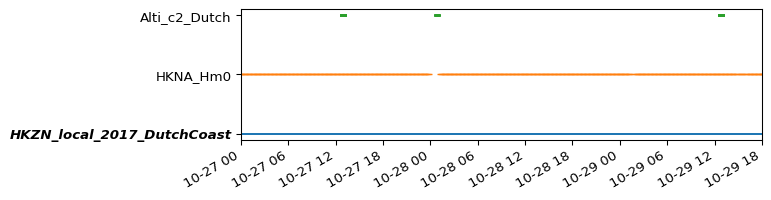

In [6]:
ms.plotting.temporal_coverage(obs=[o1, o2], mod=mr);

## Spatial overview

The spatial coverage of observations and model results can be plotted
using the
[`spatial_overview`](../api/plotting.spatial_overview.html#modelskill.plotting.spatial_overview)
function:

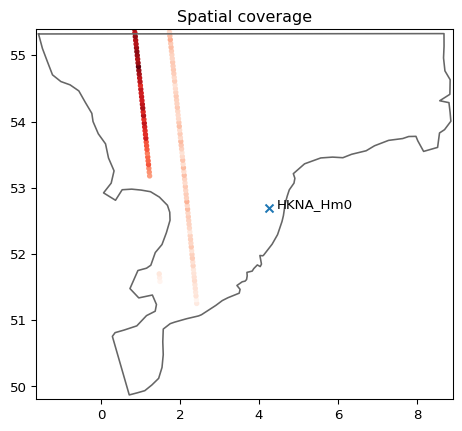

In [7]:
ms.plotting.spatial_overview([o1, o2], mr);

## Compared data

The `plot` accessor on a
[`Comparer`](../api/Comparer.html#modelskill.Comparer) or
[`ComparerCollection`](../api/ComparerCollection.html#modelskill.ComparerCollection)
object can be used to plot the compared data:

In [8]:
cmp = ms.match(obs=o1, mod=mr)
cmp

<Comparer>
Quantity: Significant wave height [m]
Observation: HKNA_Hm0, n_points=386
Model(s):
0: HKZN_local_2017_DutchCoast

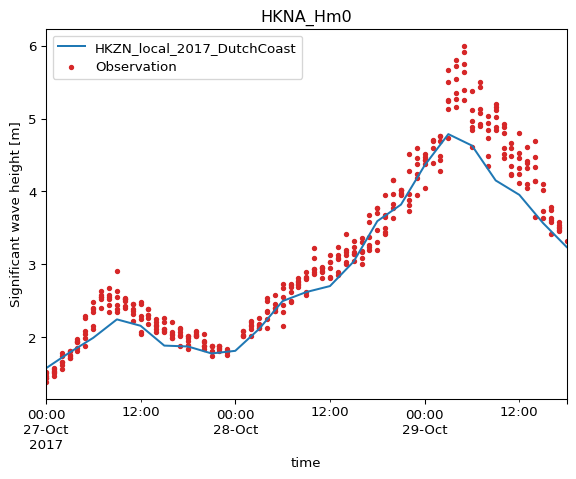

In [9]:
cmp.plot.timeseries();

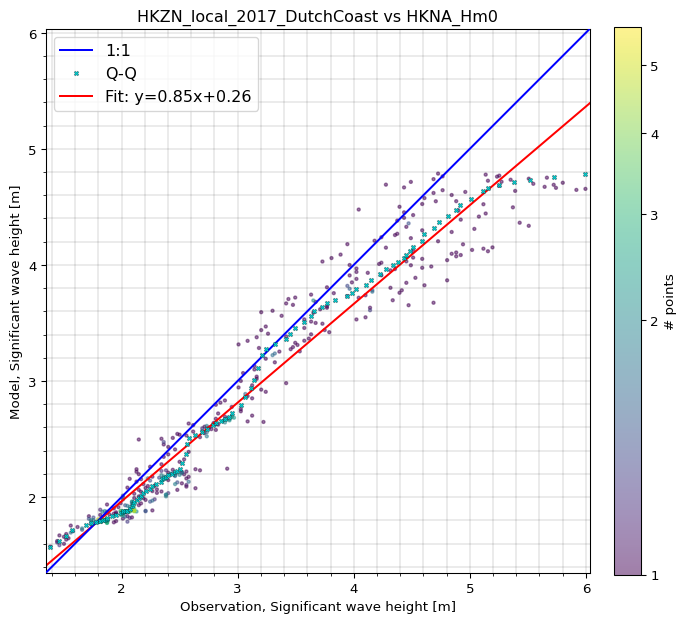

In [10]:
cmp.plot.scatter();

## Taylor diagrams

A Taylor diagram shows how well a model result matches an observation in
terms of correlation, standard deviation and root mean squared error.
The `taylor` plot can be accessed through the Comparer
[`plot`](../api/comparison.ComparerPlotter.html#modelskill.comparison.ComparerPlotter)
accessor or the ComparerCollection
[`plot`](../api/comparison.ComparerCollectionPlotter.html#modelskill.comparison.ComparerCollectionPlotter)
accessor:

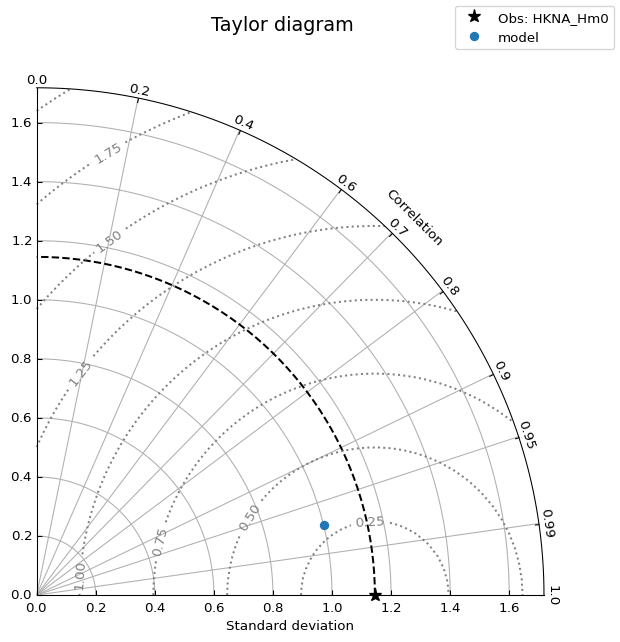

In [11]:
cmp.plot.taylor()

The radial distance from the point to the observation point is the
standard deviation ratio, the angle is the correlation coefficient and
the distance from the observation point to the model point is the root
mean square error ratio. The closer the model point is to the
observation point, the better the model result matches the observation.
The closer the model point is to the origin, the better the model result
matches the observation in terms of standard deviation and root mean
square error. The closer the model point is to the horizontal axis, the
better the model result matches the observation in terms of correlation.

## Directional data (e.g. wind or currents)

Directional data can be plotted using the
[`wind_rose`](../api/plotting.wind_rose.html#modelskill.plotting.wind_rose).
The function takes an array-like structure with speed and direction as
columns (from one or two sources) and plots a wind rose:

In [12]:
import mikeio
ds = mikeio.read("../data/wave_dir.dfs0")
df = ds[[0,2,1,3]].to_dataframe()
df.round(2).head()

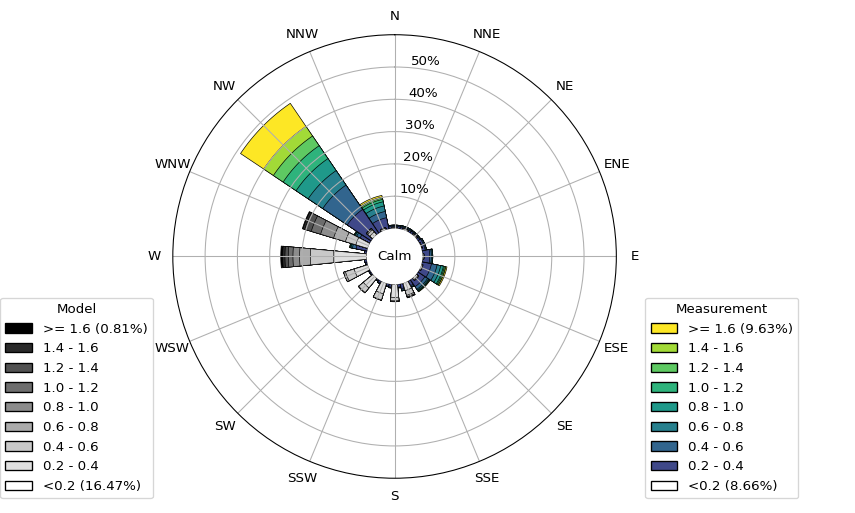

In [13]:
ms.plotting.wind_rose(df, figsize=(12,6));